In [2]:
# %pip install matplotlib
# %pip install numpy
# %pip install scikit-learn

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math

#Exercício1

Gere 400 amostras distribuidas com base em 2 features e
distribuidas em k=4 clusters.

Plote os dados gerados.

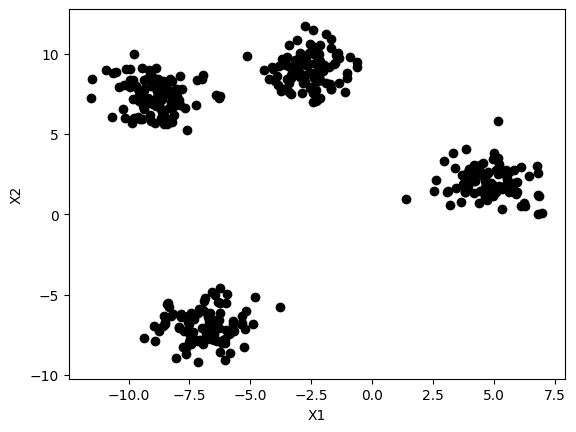

In [4]:
data, lx = make_blobs(n_samples=400, n_features=2, centers=4, random_state=42)
plt.scatter(data[:,0],data[:,1], marker='o', color="black")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

#Exercício 2
Selecione k amostras aleatórias para serem suas médias
(centroides).

Tenha cuidado para não selecionar a mesma amostra mais de
uma vez.

Plote os centroides no gráfico utilizando símbolos diferentes.

In [5]:
k=4
index = np.random.choice(len(data), size=k, replace=False)
centroids = data[index].copy()

In [6]:
markers = ['o', 'v', '^', 'X', '*']
colors = ['red', 'purple', 'green', 'orange', 'cyan']

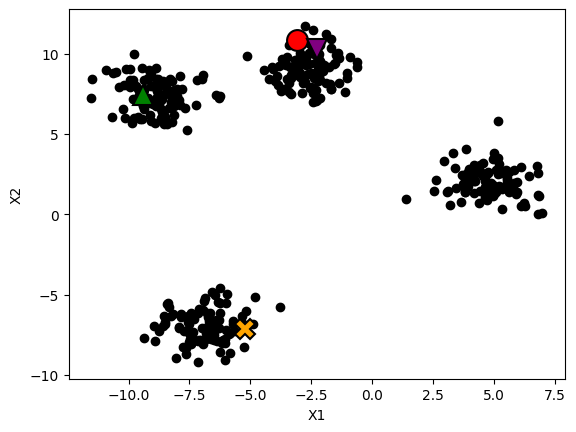

In [7]:
plt.scatter(data[:,0],data[:,1], marker='o', color="black")
plt.xlabel('X1')
plt.ylabel('X2')

for i in range(len(centroids)):
    plt.plot(centroids[i, 0], centroids[i, 1], marker=markers[i], color=colors[i], markersize=15, markeredgewidth=1.5, markeredgecolor='black')

plt.show()

#Exercício 3

Calcule a distância entre cada amostra e cada centróide, e
atribua um cluster a cada amostra.

Plote as amostras de cada cluster em uma cor diferente.

In [8]:
distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)**2
cluster = np.argmin(distances, axis=1)

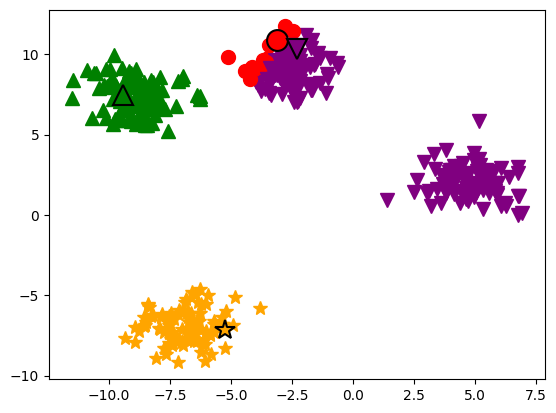

In [9]:
markers = ['o', 'v', '^', '*', 'X']
colors = ['red', 'purple', 'green', 'orange', 'cyan']

for i in range(len(data)):
    plt.plot(data[i, 0], data[i, 1], marker=markers[cluster[i]], color=colors[cluster[i]], markersize=10)

for i in range(len(centroids)):
    plt.plot(centroids[i, 0], centroids[i, 1], marker=markers[i], color=colors[i], markersize=15, markeredgewidth=1.5, markeredgecolor='black')

plt.show()

#Exercício 4
Agora, você tem um grupo de dados já atribuído a cada cluster.

Calcule uma nova média em cada cluster.

Plote os novos centroides no gráfico.

In [14]:
new_centroids = np.zeros_like(centroids)

for i in range(k):
    curr_cluster = (cluster == i)
    if np.any(curr_cluster):
        new_centroids[i] = data[curr_cluster].mean(axis=0)
    else:
        new_centroids[i] = data[np.random.choice(len(data))]

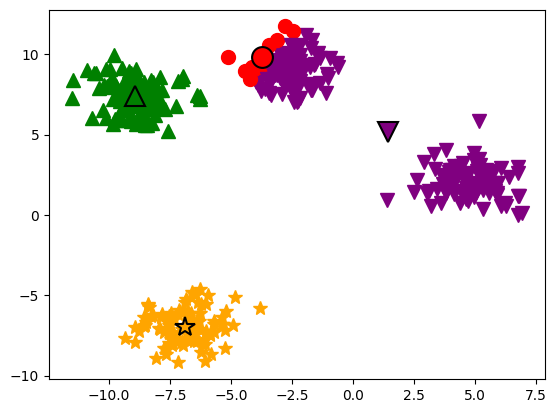

In [15]:
markers = ['o', 'v', '^', '*', 'X']
colors = ['red', 'purple', 'green', 'orange', 'cyan']

for i in range(len(data)):
    plt.plot(data[i, 0], data[i, 1], marker=markers[cluster[i]], color=colors[cluster[i]], markersize=10)

for i in range(len(new_centroids)):
    plt.plot(new_centroids[i, 0], new_centroids[i, 1], marker=markers[i], color=colors[i], markersize=15, markeredgewidth=1.5, markeredgecolor='black')

plt.show()

#Exercício 5

In [30]:
def printPlot(data, cluster, centroids=None):
    markers = ['o', 'v', '^', '*', 'X']
    colors = ['red', 'purple', 'green', 'orange', 'cyan']

    for i in range(len(data)):
        plt.plot(data[i, 0], data[i, 1], marker=markers[cluster[i]], color=colors[cluster[i]], markersize=10)

    if centroids is not None:
        for i in range(len(centroids)):
            plt.plot(centroids[i, 0], centroids[i, 1], marker=markers[i], color=colors[i], markersize=15, markeredgewidth=1.5, markeredgecolor='black')

    plt.show()

In [24]:
def kmeans(data, n_clusters=2, print_steps=False):

    index = np.random.choice(len(data), size=n_clusters, replace=False)
    centroids = data[index].copy()

    clusters = np.zeros(len(data),dtype=int)

    while True:

        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)**2
        clusters = np.argmin(distances, axis=1)

        if print_steps: printPlot(data, clusters, centroids)

        new_centroids = np.zeros_like(centroids)

        for i in range(n_clusters):
            curr_cluster = (clusters == i)
            if np.any(curr_cluster):
                new_centroids[i] = data[curr_cluster].mean(axis=0)
            else:
                data[np.random.choice(len(data))]

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters.tolist(), centroids


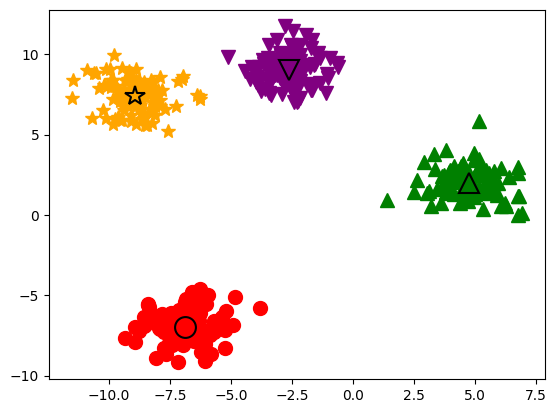

In [19]:
cluster,centroids=kmeans(data=data, n_clusters=4,print_steps=False)
printPlot(data,cluster,centroids)

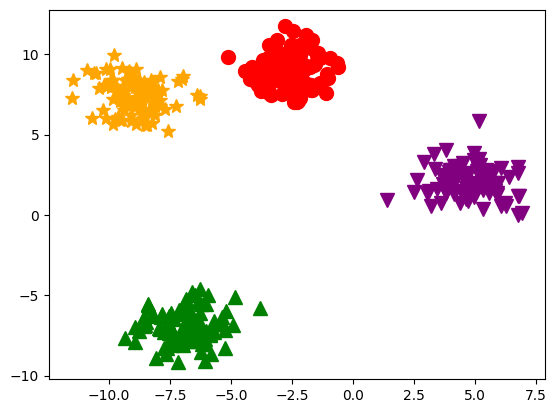

In [32]:
printPlot(data,lx)